In [1]:
import numpy as np
import tensorflow as tf
from ipywidgets import interact
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.framework.ops import disable_eager_execution

from models.autoencoder import VariationalAutoencoder as VAE
import utils.config as cfg

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
disable_eager_execution()

Loading the model

In [3]:
vae = VAE((208, 160, 1),
            [128,64,64, 128],
            cfg.CONV_KERNEL_SIZES,
            cfg.CONV_STRIDES,
            cfg.CONV_T_FILTERS,
            cfg.CONV_T_KERNEL_SIZES,
            cfg.CONV_T_STRIDES,
            z_dim=80,
            use_batch_norm=True)
vae.compile(1e-4, 8000)
vae.model.load_weights(r"E:\RL\Clash Royale\workspace\models\weights\vae8.h5")

Instructions for updating:
Colocations handled automatically by placer.


Loading our images

In [4]:
datagen = ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory(r"E:\RL\Clash Royale\workspace\card_train\images_np",
                                         target_size=(208, 160),
                                         color_mode= "grayscale",
                                         class_mode="input")

Found 392279 images belonging to 2 classes.


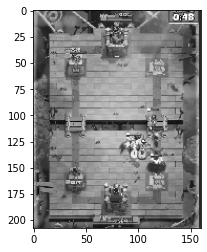

In [5]:
data = train_data.next()[0]
plt.imshow(data[10], cmap="gray")

In [21]:
enc_mu = vae.encoder_mu_log_var.predict(data)
mu = enc_mu[0][10]
log_var = enc_mu[1][10]
enc_z = vae.encoder.predict(data)[10]

array([ 0,  2, 14, 19, 31, 33, 35, 42, 45, 49, 52, 56, 61, 64, 68, 77],
      dtype=int64)

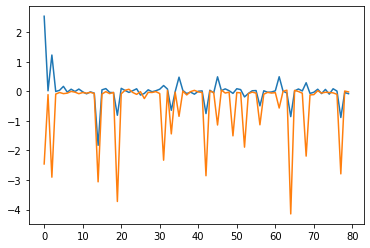

In [23]:
plt.plot(mu)
plt.plot(log_var)
hot = np.where(abs(log_var) > 0.3)[0]
hot

In [24]:
def play_with_z(z0 = enc_z[0]
                ,z2 = enc_z[2]
                ,z14 = enc_z[14]
                ,z19 = enc_z[19]
                ,z26 = enc_z[26]
                ,z31 = enc_z[31]
                ,z33 = enc_z[33]
                ,z35 = enc_z[35]
                ,z42= enc_z[42]
                ,z45= enc_z[45]
                ,z49= enc_z[49]
                ,z52= enc_z[52]
                ,z56= enc_z[56]
                ,z61= enc_z[61]
                ,z64= enc_z[64]
                ,z68= enc_z[68]
                ,z77= enc_z[77]
                ):
    z = enc_z
    z[0] = z0
    z[2] = z2
    z[14] = z14
    z[19] = z19
    z[26] = z26
    z[31] = z31
    z[33] = z33
    z[35] = z35
    z[42] = z42
    z[45] = z45
    z[49] = z49
    z[52] = z52
    z[56] = z56
    z[61] = z61
    z[64] = z64
    z[68] = z68
    z[77] = z77
    
    decoded_obs = vae.decoder.predict(np.array([z]), verbose=0)[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs, cmap="gray")

In [25]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z14=(-3.0,3.0,0.1)
        , z19=(-3.0,3.0,0.1)
        , z26=(-3.0,3.0,0.1)
        , z31=(-3.0,3.0,0.1)
        , z33=(-3.0,3.0,0.1)
        , z35=(-3.0,3.0,0.1)
        , z42=(-3.0,3.0,0.1)
        , z45=(-3.0,3.0,0.1)
        , z49=(-3.0,3.0,0.1)
        , z52=(-3.0,3.0,0.1)
        , z56=(-3.0,3.0,0.1)
        , z61=(-3.0,3.0,0.1)
        , z64=(-3.0,3.0,0.1)
        , z68=(-3.0,3.0,0.1)
        , z77=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=2.45758056640625, description='z0', max=3.0, min=-3.0), FloatSlider(va…

<function __main__.play_with_z(z0=2.4575806, z2=1.3030479, z14=-1.5135065, z19=-0.85068846, z26=1.0979735, z31=-0.09911142, z33=-0.1254164, z35=-0.11485228, z42=-0.8128379, z45=-0.16290513, z49=-0.3842549, z52=-0.25951794, z56=-0.9953568, z61=0.00634557, z64=-0.86628956, z68=0.68074375, z77=-1.0125035)>